In [2]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score

### Uniform Distribution

tossing a dice

In [3]:
n_trials= 10000
samples=[]
for counter in range(1,n_trials):
    samples.append(np.random.choice(np.arange(1,7)))
#samples

/opt/anaconda3/envs/DA_new/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

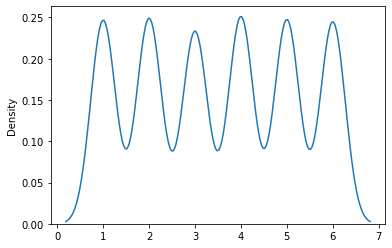

In [4]:
#sns.distplot(samples,hist=True)#sns.histplot(samples)

sns.distplot(samples,hist=False)

/opt/anaconda3/envs/DA_new/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


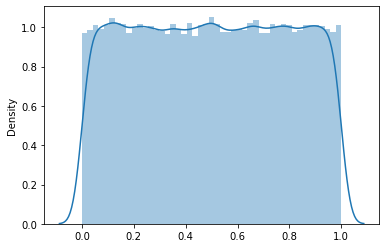

In [5]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.uniform(size=100000), hist=True)

plt.show()

/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


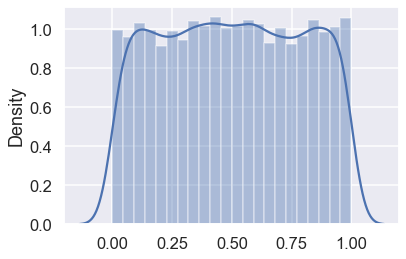

In [34]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.uniform(size=10000), hist=True)

plt.show()

### Probability density estimation

In [6]:
# generate a sample
sample = random.normal(loc=50, scale=5, size=1000)
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=50.002, Standard Deviation=5.004


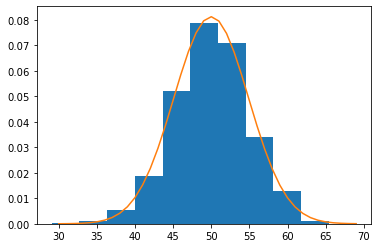

In [30]:
# define the distribution
dist = sc.stats.norm(sample_mean, sample_std)

# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]

# plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

In [160]:
sc.stats.lognorm.rvs(loc=0,scale=1,s=1000)

6.836713041715087e+91

## Data Trasnformations

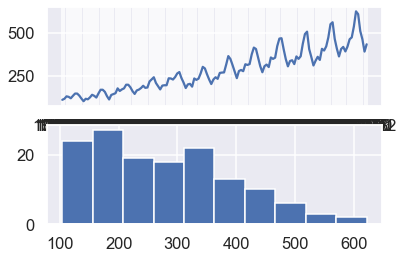

In [138]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

### Square Root Transform

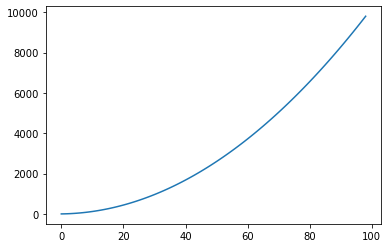

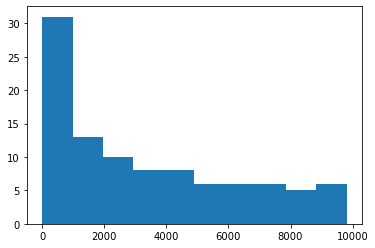

In [31]:
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
# line plot
pyplot.plot(series)
pyplot.show()
# histogram
pyplot.hist(series)
pyplot.show()

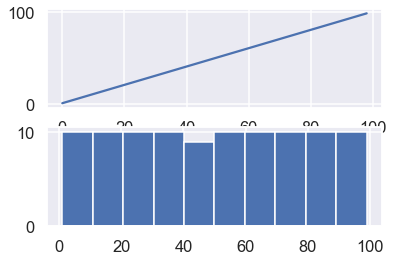

In [167]:
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

#### Square root transform Airpassengers

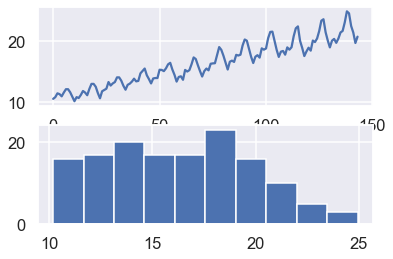

In [168]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

## Log Transform

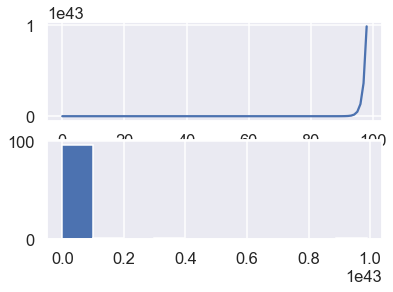

In [170]:
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

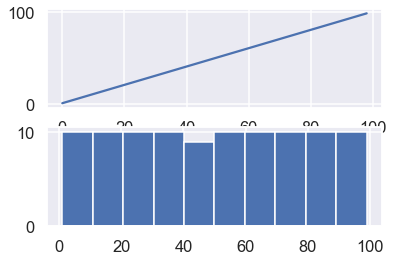

In [171]:
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

### Log Trasnform Air passengers

Hint: It is important to note that this operation assumes values are positive and non-zero.

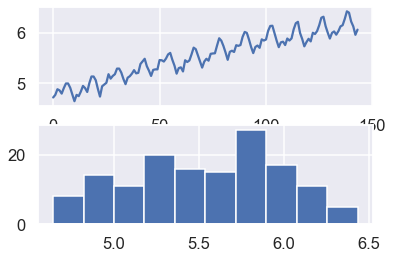

In [172]:
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### Box-Cox Transform
The square root transform and log transform belong to a class of transforms called power transforms.

lambda = -1. is a reciprocal transform.
lambda = -0.5 is a reciprocal square root transform.
lambda = 0.0 is a log transform.
lambda = 0.5 is a square root transform.
lambda = 1.0 is no transform.

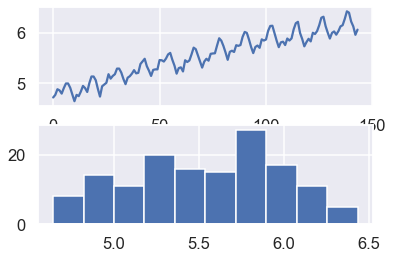

In [173]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

Auto Lambda for BOX cox

Lambda: 0.148023


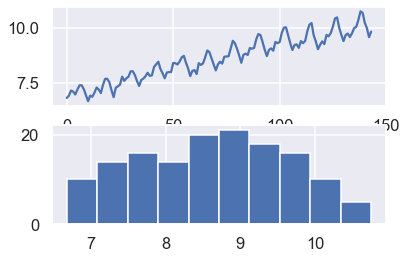

In [174]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### Kernel Density function for Bimodal data

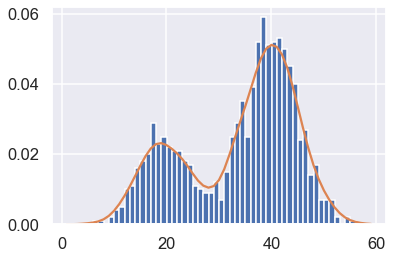

In [135]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

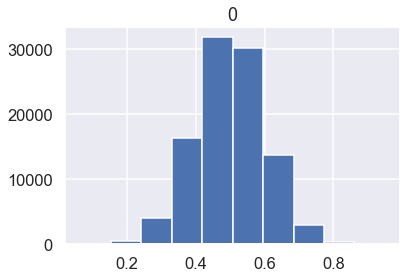

In [30]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0.5, 0.1
s = np.random.normal(mu, sigma, 100000)
np.mean(s)
s
pd.DataFrame(s).hist()

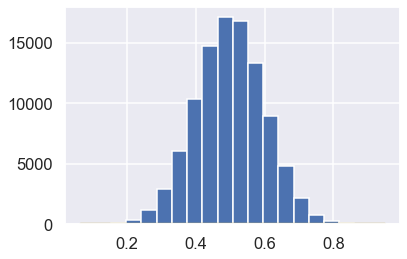

In [162]:
# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()

### MinMax Scaler

In [163]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.data_max_)
print(scaler.transform(data))

MinMaxScaler()
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [164]:
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

### Standard Scaler    NORMALIZATION 

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

In [35]:
data = [[0, 0], [0, 0], [2, 3], [1, 1]]
scaler.fit_transform(data)

array([[-0.90453403, -0.81649658],
       [-0.90453403, -0.81649658],
       [ 1.50755672,  1.63299316],
       [ 0.30151134,  0.        ]])

In [32]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

StandardScaler()
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


Referecnes: some examples taken from https://machinelearningmastery.com/ 